In [190]:
import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
import math
import time

In [191]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN

In [234]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, mean_squared_error, root_mean_squared_error
from sklearn.metrics import make_scorer

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
import xgboost as xgb

In [260]:
# So we can see all of the columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 600)

In [194]:
# Read in data
df = pd.read_csv("datas/train.csv", parse_dates=['host_since', 'first_review', 'last_review'])

In [291]:
df[df["beds"] == 0 ]

,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews,shared_bathrooms,has_washer,has_dryer,has_dishwasher,has_freezer,has_hot_tub,has_pool,has_gym,has_balcony,has_backyard
77,Luxury Bedrooms in Historic Brownstone,"Come stay in a historic Brooklyn brownstone, w...",Private room in rental unit,3,Bedford-Stuyvesant,Brooklyn,40.683178,-73.921379,2014-03-24,within an hour,100.0,100.0,True,1.0,4.0,"['email', 'phone']",True,True,1,0,1,0,Private room,2,1.0,1 bath,2.0,0.0,"[Dishwasher, Dining table, TV, Stove, Smoke al...",True,1,11,24,186,False,2,365,15,15,4,2024-04-21,2024-08-25,4.93,5.00,4.87,5.00,5.00,4.93,5.00,3.28,McKenzie and Alex were great hosts! The place ...,False,True,False,True,True,False,False,False,False,False
81,Private Room 819 | Shared Bath,Discover private lovely unit 819 that accommod...,Private room in rental unit,1,Midtown,Manhattan,40.746299,-73.987150,2021-05-12,within an hour,100.0,100.0,False,61.0,68.0,"['email', 'phone']",True,True,61,0,61,0,Private room,3,2.0,2 shared baths,1.0,0.0,"[Building staff, TV, Exterior security cameras...",True,8,28,58,144,True,1,365,2,2,1,2024-07-29,2024-09-03,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.54,Fantastic location and great value for the mon...,True,False,False,False,False,False,False,False,False,False
106,Cute Bedroom in Upper Manhattan,Explore New York City from this home base loca...,Private room in rental unit,0,Harlem,Manhattan,40.815856,-73.944409,2023-08-21,within an hour,96.0,60.0,False,15.0,17.0,"['email', 'phone']",True,True,15,0,15,0,Private room,2,3.0,3 baths,1.0,0.0,"[Kitchen, TV, Smoke alarm, Carbon monoxide ala...",True,29,59,89,269,False,30,365,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False
116,Amazing Bedroom Upper Manhattan,Welcome to your urban oasis in the heart of Up...,Private room in rental unit,0,Harlem,Manhattan,40.809956,-73.944484,2024-04-16,within an hour,100.0,67.0,False,13.0,13.0,['phone'],True,True,13,1,12,0,Private room,2,0.0,0 baths,1.0,0.0,"[Kitchen, TV, Smoke alarm, Carbon monoxide ala...",True,4,34,64,339,False,30,365,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False
158,Small and cozy room in Queens (Basement),Have fun with the whole family at this stylish...,Private room in home,1,St. Albans,Queens,40.704983,-73.757646,2018-04-23,within an hour,90.0,92.0,False,5.0,5.0,"['email', 'phone']",True,True,5,0,5,0,Private room,2,2.0,2 baths,1.0,0.0,"[Kitchen, TV, Exterior security cameras on pro...",True,27,56,86,266,False,30,90,1,1,0,2024-07-02,2024-07-02,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.45,Michelle has been an excellent host for my fam...,False,False,False,False,False,False,False,False,False,False
195,Private room 5 mins to Manhattan 2 blocks to t...,Cozy room with private entrance. Large flat sc...,Private room in rental unit,0,Astoria,Queens,40.760010,-73.915350,2015-12-15,a few days or more,25.0,100.0,False,3.0,3.0,['phone'],True,False,2,0,2,0,Private room,1,1.0,1 private bath,1.0,0.0,"[TV, Smoke alarm, Heating, Refrigerator, Ether...",Tru

In [284]:
df["host_verifications"].value_counts()

host_verifications
['email', 'phone']                  12137
['email', 'phone', 'work_email']     2007
['phone']                            1503
['phone', 'work_email']                39
['email']                               9
[]                                      1
Name: count, dtype: int64

In [283]:
df.groupby('host_verifications')['price'].mean()

host_verifications
['email', 'phone', 'work_email']    3.338814
['email', 'phone']                  2.334514
['email']                           3.444444
['phone', 'work_email']             3.282051
['phone']                           2.330672
[]                                  5.000000
Name: price, dtype: float64

In [195]:
df.head()

,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renov...",Entire rental unit,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23,within a day,100.0,100.0,True,2.0,2.0,"['email', 'phone']",True,True,1,1,0,0,Entire home/apt,4,2.0,2 baths,2.0,2.0,"[""Dishwasher"", ""Single level home"", ""Stove"", ""...",True,12,42,70,70,False,30,1125,34,5,1,2019-04-28,2024-08-10,5.00,5.00,4.97,5.0,5.0,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern..."
1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret ...",Private room in rental unit,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14,within an hour,100.0,98.0,True,1.0,1.0,"['email', 'phone']",True,True,1,0,1,0,Private room,2,1.0,1 private bath,1.0,2.0,"[""Dishwasher"", ""Dining table"", ""Mini fridge"", ...",True,10,20,49,324,False,1,29,30,30,6,2024-01-13,2024-09-02,4.83,4.87,4.93,4.8,4.9,4.90,4.63,3.81,I booked this place last minute to attend a fu...
2,Bay Ridge Metroscape: Inviting NYC Studio Living,This studio presents unparalleled convenience ...,Entire rental unit,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31,within an hour,100.0,100.0,False,52.0,55.0,"['email', 'phone']",True,True,52,50,2,0,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Cleaning products"", ""Elevator"", ""Mini fridge...",True,17,44,70,146,True,1,29,5,5,2,2024-06-27,2024-08-17,4.60,4.80,4.20,4.8,4.8,4.80,4.20,2.14,Great spot! Little far out but overall a great...
3,"New HDTV room, 20 minutes to Manhattan #724",- Furnished room in a newly renovated apartmen...,Private room in rental unit,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11,within an hour,99.0,23.0,False,727.0,1336.0,"['email', 'phone']",True,True,719,0,719,0,Private room,1,1.5,1.5 baths,4.0,1.0,"[""Kitchen"", ""Hot water"", ""Dedicated workspace""...",True,0,0,0,111,False,30,365,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Just What You Were Looking For! Pets Allowed,This modern property in Manhattan is just step...,Room in hotel,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23,within an hour,93.0,95.0,False,707.0,2453.0,"['email', 'phone']",True,True,73,0,0,0,Hotel room,2,1.0,1 bath,1.0,1.0,"[""TV"", ""Smoke alarm"", ""Paid parking off premis...",True,4,13,22,241,True,1,1125,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Are bathrooms shared?
df["shared_bathrooms"] = df['bathrooms_text'].str.contains('Shared|shared', case=False)

In [274]:
df["room_type"].value_counts()

room_type
Entire home/apt    8592
Private room       6737
Hotel room          200
Shared room         167
Name: count, dtype: int64

In [269]:
df['amenities'] = df['amenities'].apply(ast.literal_eval)

# Fancier amenities to look for
fancier_items_exact = ["Washer", "Dryer", "Dishwasher", "Freezer", "BBQ grill"]
fancier_items_contains = ["Hot Tub", "Pool", "Gym", "Balcony", "Backyard"]

# Check for exact matches (case insensitive)
def has_exact_item(row, item):
    lower_amenities = [amenity.lower() for amenity in row]
    return item.lower() in lower_amenities

# Check for substring matches (case insensitive)
def has_contained_item(row, item):
    lower_amenities = [amenity.lower() for amenity in row]
    return any(item.lower() in amenity for amenity in lower_amenities)

# Create columns for exact matches
for item in fancier_items_exact:
    df[f'has_{item.lower().replace(" ", "_")}'] = df['amenities'].apply(lambda x: has_exact_item(x, item))

# Create columns for substring matches
for item in fancier_items_contains:
    df[f'has_{item.lower().replace(" ", "_")}'] = df['amenities'].apply(lambda x: has_contained_item(x, item))

ValueError: malformed node or string: ['Dishwasher', 'Single level home', 'Stove', 'Smoke alarm', '49 inch HDTV with Amazon Prime Video, Apple TV, Disney+, HBO Max, Hulu, Netflix, Roku', 'Central air conditioning', 'Cooking basics', 'Heating', 'Private patio or balcony', 'Exterior security cameras on property', 'Refrigerator', 'Long term stays allowed', 'Kitchen', 'Hair dryer', 'Hot water', 'Free street parking', 'Iron', 'Private entrance', 'Fire extinguisher', 'Microwave', 'Essentials', 'Smart lock', 'Carbon monoxide alarm', 'Hangers', 'Shampoo', 'Dishes and silverware', 'Oven', 'Bathtub', 'Self check-in', 'First aid kit', 'Coffee maker', 'Wifi']

In [198]:
# Drop some unwanted columns
str_cols = ["name", "description", "reviews", "bathrooms_text", "amenities", "host_verifications", "property_type"]
df_simple = df.drop(columns=str_cols)
df_simple = df_simple.drop(columns=[
    "has_availability",
    # "neighbourhood_cleansed",
    # "neighbourhood_group_cleansed"
])

In [199]:
df_simple.head()

,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,accommodates,bathrooms,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,shared_bathrooms,has_washer,has_dryer,has_dishwasher,has_freezer,has_hot_tub,has_pool,has_gym,has_balcony,has_backyard
0,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23,within a day,100.0,100.0,True,2.0,2.0,True,True,1,1,0,0,Entire home/apt,4,2.0,2.0,2.0,12,42,70,70,False,30,1125,34,5,1,2019-04-28,2024-08-10,5.00,5.00,4.97,5.0,5.0,4.71,4.94,0.52,False,False,False,True,False,False,False,False,True,False
1,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14,within an hour,100.0,98.0,True,1.0,1.0,True,True,1,0,1,0,Private room,2,1.0,1.0,2.0,10,20,49,324,False,1,29,30,30,6,2024-01-13,2024-09-02,4.83,4.87,4.93,4.8,4.9,4.90,4.63,3.81,False,False,False,True,True,False,False,False,True,False
2,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31,within an hour,100.0,100.0,False,52.0,55.0,True,True,52,50,2,0,Entire home/apt,2,1.0,0.0,1.0,17,44,70,146,True,1,29,5,5,2,2024-06-27,2024-08-17,4.60,4.80,4.20,4.8,4.8,4.80,4.20,2.14,False,False,False,False,False,False,False,False,False,False
3,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11,within an hour,99.0,23.0,False,727.0,1336.0,True,True,719,0,719,0,Private room,1,1.5,4.0,1.0,0,0,0,111,False,30,365,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,False,False,True,False,False,False,False
4,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23,within an hour,93.0,95.0,False,707.0,2453.0,True,True,73,0,0,0,Hotel room,2,1.0,1.0,1.0,4,13,22,241,True,1,1125,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,True,False,False


In [200]:
# Fill missing values for boolean features
bool_cols = ["shared_bathrooms", "host_is_superhost"]
df_simple.fillna({col: df_simple[col].mode()[0] for col in bool_cols}, inplace=True)

/var/folders/wr/xdjfb2c1569g2d6hjp8hhhbh0000gn/T/ipykernel_65432/3656576681.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_simple.fillna({col: df_simple[col].mode()[0] for col in bool_cols}, inplace=True)


In [201]:
# Example: Filling missing values with median for numerical features
numerical_features = df_simple.select_dtypes(include=['int64', 'float64']).columns
df_simple[numerical_features] = df_simple[numerical_features].fillna(df_simple[numerical_features].median())

In [202]:
# Create KMeans clusters
n_clusters = 300  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# df_simple['location_cluster'] = DBSCAN(eps=3, min_samples=2).fit_predict(df_simple[['latitude', 'longitude']])
df_simple['location_cluster'] = kmeans.fit_predict(df_simple[['latitude', 'longitude']])

In [203]:
enc = OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=5, drop="if_binary", sparse_output=False)
categorical_features = [
    "neighbourhood_cleansed", 
    "neighbourhood_group_cleansed", 
    "host_response_time", "room_type", "location_cluster"
]
enc.fit(df_simple[categorical_features])
encoded_array = enc.transform(df_simple[categorical_features])
# Retrieve the feature names after encoding
encoded_feature_names = enc.get_feature_names_out(categorical_features)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=df_simple.index)

In [204]:
# Drop the original categorical columns
df_processed = df_simple.drop(columns=categorical_features)

# Concatenate the encoded features
df_processed = pd.concat([df_processed, encoded_df], axis=1)

In [205]:
df_processed.shape

(15696, 535)

In [206]:
datetime_cols = ["host_since", "first_review", "last_review"]
df_processed[datetime_cols] = df_processed[datetime_cols].astype("int64")

In [207]:
df["host_response_time"].value_counts()

host_response_time
within an hour        8367
within a few hours    2908
within a day          1472
a few days or more     746
Name: count, dtype: int64

In [186]:
print(list(df_processed.columns))

['price', 'latitude', 'longitude', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'instant_bookable', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'shared_bathrooms', 'has_washer', 'has_dryer', 'has_dishwasher', 'has_freezer', 'has_hot_tub', 'has_pool', 'has_gym'

In [208]:
X, y = df_processed.drop(columns=["price"]), df_processed["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23
)

In [209]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate with cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Since cross_val_score returns negative values for losses
rmse_scores = -scores
print(f"Average RMSE: {rmse_scores.mean()}")

Average RMSE: 0.9017804420086565


In [232]:
rf_param_grid = {
    'n_estimators': [100, 200, 500],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],       # Number of features to consider at each split
    'bootstrap': [True, False]                    # Whether to use bootstrap samples
}


# Initialize the Random Forest Classifier
rf = RandomForestRegressor(random_state=23)

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(
    estimator=rf,
    n_iter=10,
    param_distributions=rf_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',  # Use RMSE as scoring metric
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit the grid search to your data
grid_search.fit(X, y)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best RMSE: 0.7977908430889888


In [210]:
my_params = {
    'n_estimators': [100, 200, 500],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],       # Number of features to consider at each split
    'bootstrap': [True, False] 
}
rf = RandomForestClassifier(**my_params, random_state=23)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=23)

In [212]:
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.9006367174478768


In [151]:
start_time = time.time()

feature_names = [f"feature {i}" for i in range(X.shape[1])]

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.070 seconds


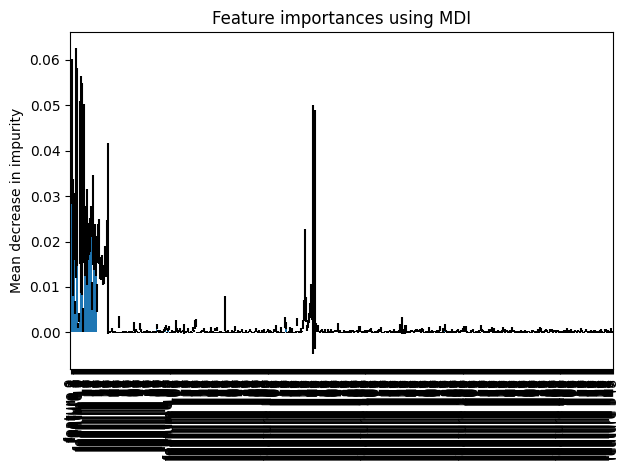

In [152]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [143]:
rf.feature_importances_

array([3.53116531e-02, 4.68715301e-02, 2.72974069e-02, 1.55091682e-02,
       2.33488556e-02, 5.41863333e-03, 3.73109445e-02, 3.64546502e-02,
       1.48462338e-03, 3.22147242e-03, 3.29546557e-02, 3.25065730e-02,
       3.15374947e-02, 2.75900679e-03, 3.27408165e-02, 1.88699068e-02,
       2.10325448e-02, 2.09454442e-02, 1.91951753e-02, 2.06291978e-02,
       2.13996068e-02, 2.44606036e-02, 7.97991111e-03, 2.47405840e-02,
       1.73325231e-02, 1.88818972e-02, 1.68362288e-02, 7.56219695e-03,
       1.95802946e-02, 2.00475834e-02, 1.41888253e-02, 1.38526734e-02,
       1.45929534e-02, 1.26218236e-02, 1.27361778e-02, 1.61068269e-02,
       1.47644640e-02, 2.00221091e-02, 2.05913315e-02, 8.32867605e-05,
       3.87222025e-05, 1.92825519e-04, 6.28633736e-04, 9.02790627e-05,
       9.21579362e-05, 2.05499313e-04, 1.54534752e-05, 5.73046427e-05,
       2.47494020e-05, 2.32416043e-03, 3.36157099e-05, 3.78589658e-05,
       4.10318427e-05, 1.38962843e-04, 3.89979966e-05, 1.87682233e-04,
      

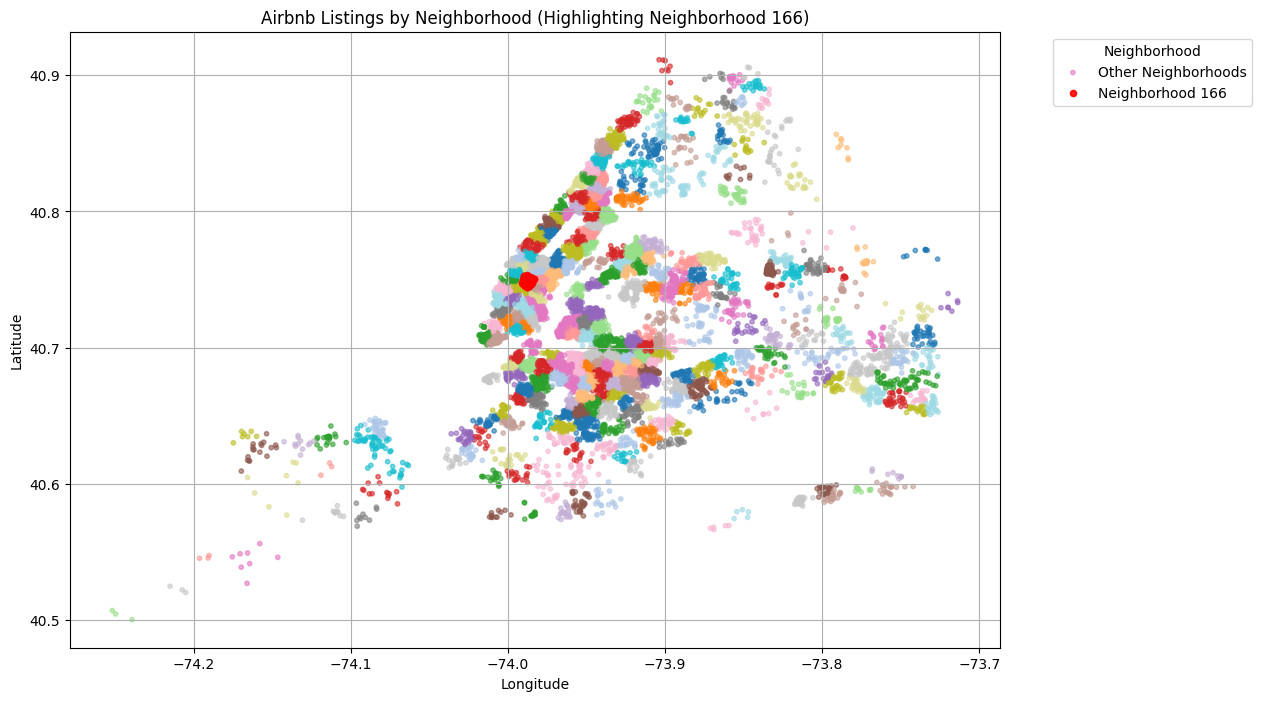

In [266]:
# Prepare unique neighborhoods and assign colors
unique_neighborhoods = df_simple['location_cluster'].unique()
neighborhood_to_color = {neighborhood: np.random.randint(300) for idx, neighborhood in enumerate(unique_neighborhoods)}
colors = df_simple['location_cluster'].map(neighborhood_to_color)

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot all neighborhoods
plt.scatter(
    df_simple['longitude'], 
    df_simple['latitude'], 
    c=colors, 
    cmap='tab20', 
    alpha=0.6, 
    s=10,
    label="Other Neighborhoods"
)

# Highlight neighborhood 166
neighborhood_166 = df_simple[df_simple['location_cluster'] == 166]
plt.scatter(
    neighborhood_166['longitude'], 
    neighborhood_166['latitude'], 
    color='red', 
    alpha=0.9, 
    s=20, 
    label="Neighborhood 166"
)

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Neighborhood')

# Add labels and title
plt.title('Airbnb Listings by Neighborhood (Highlighting Neighborhood 166)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


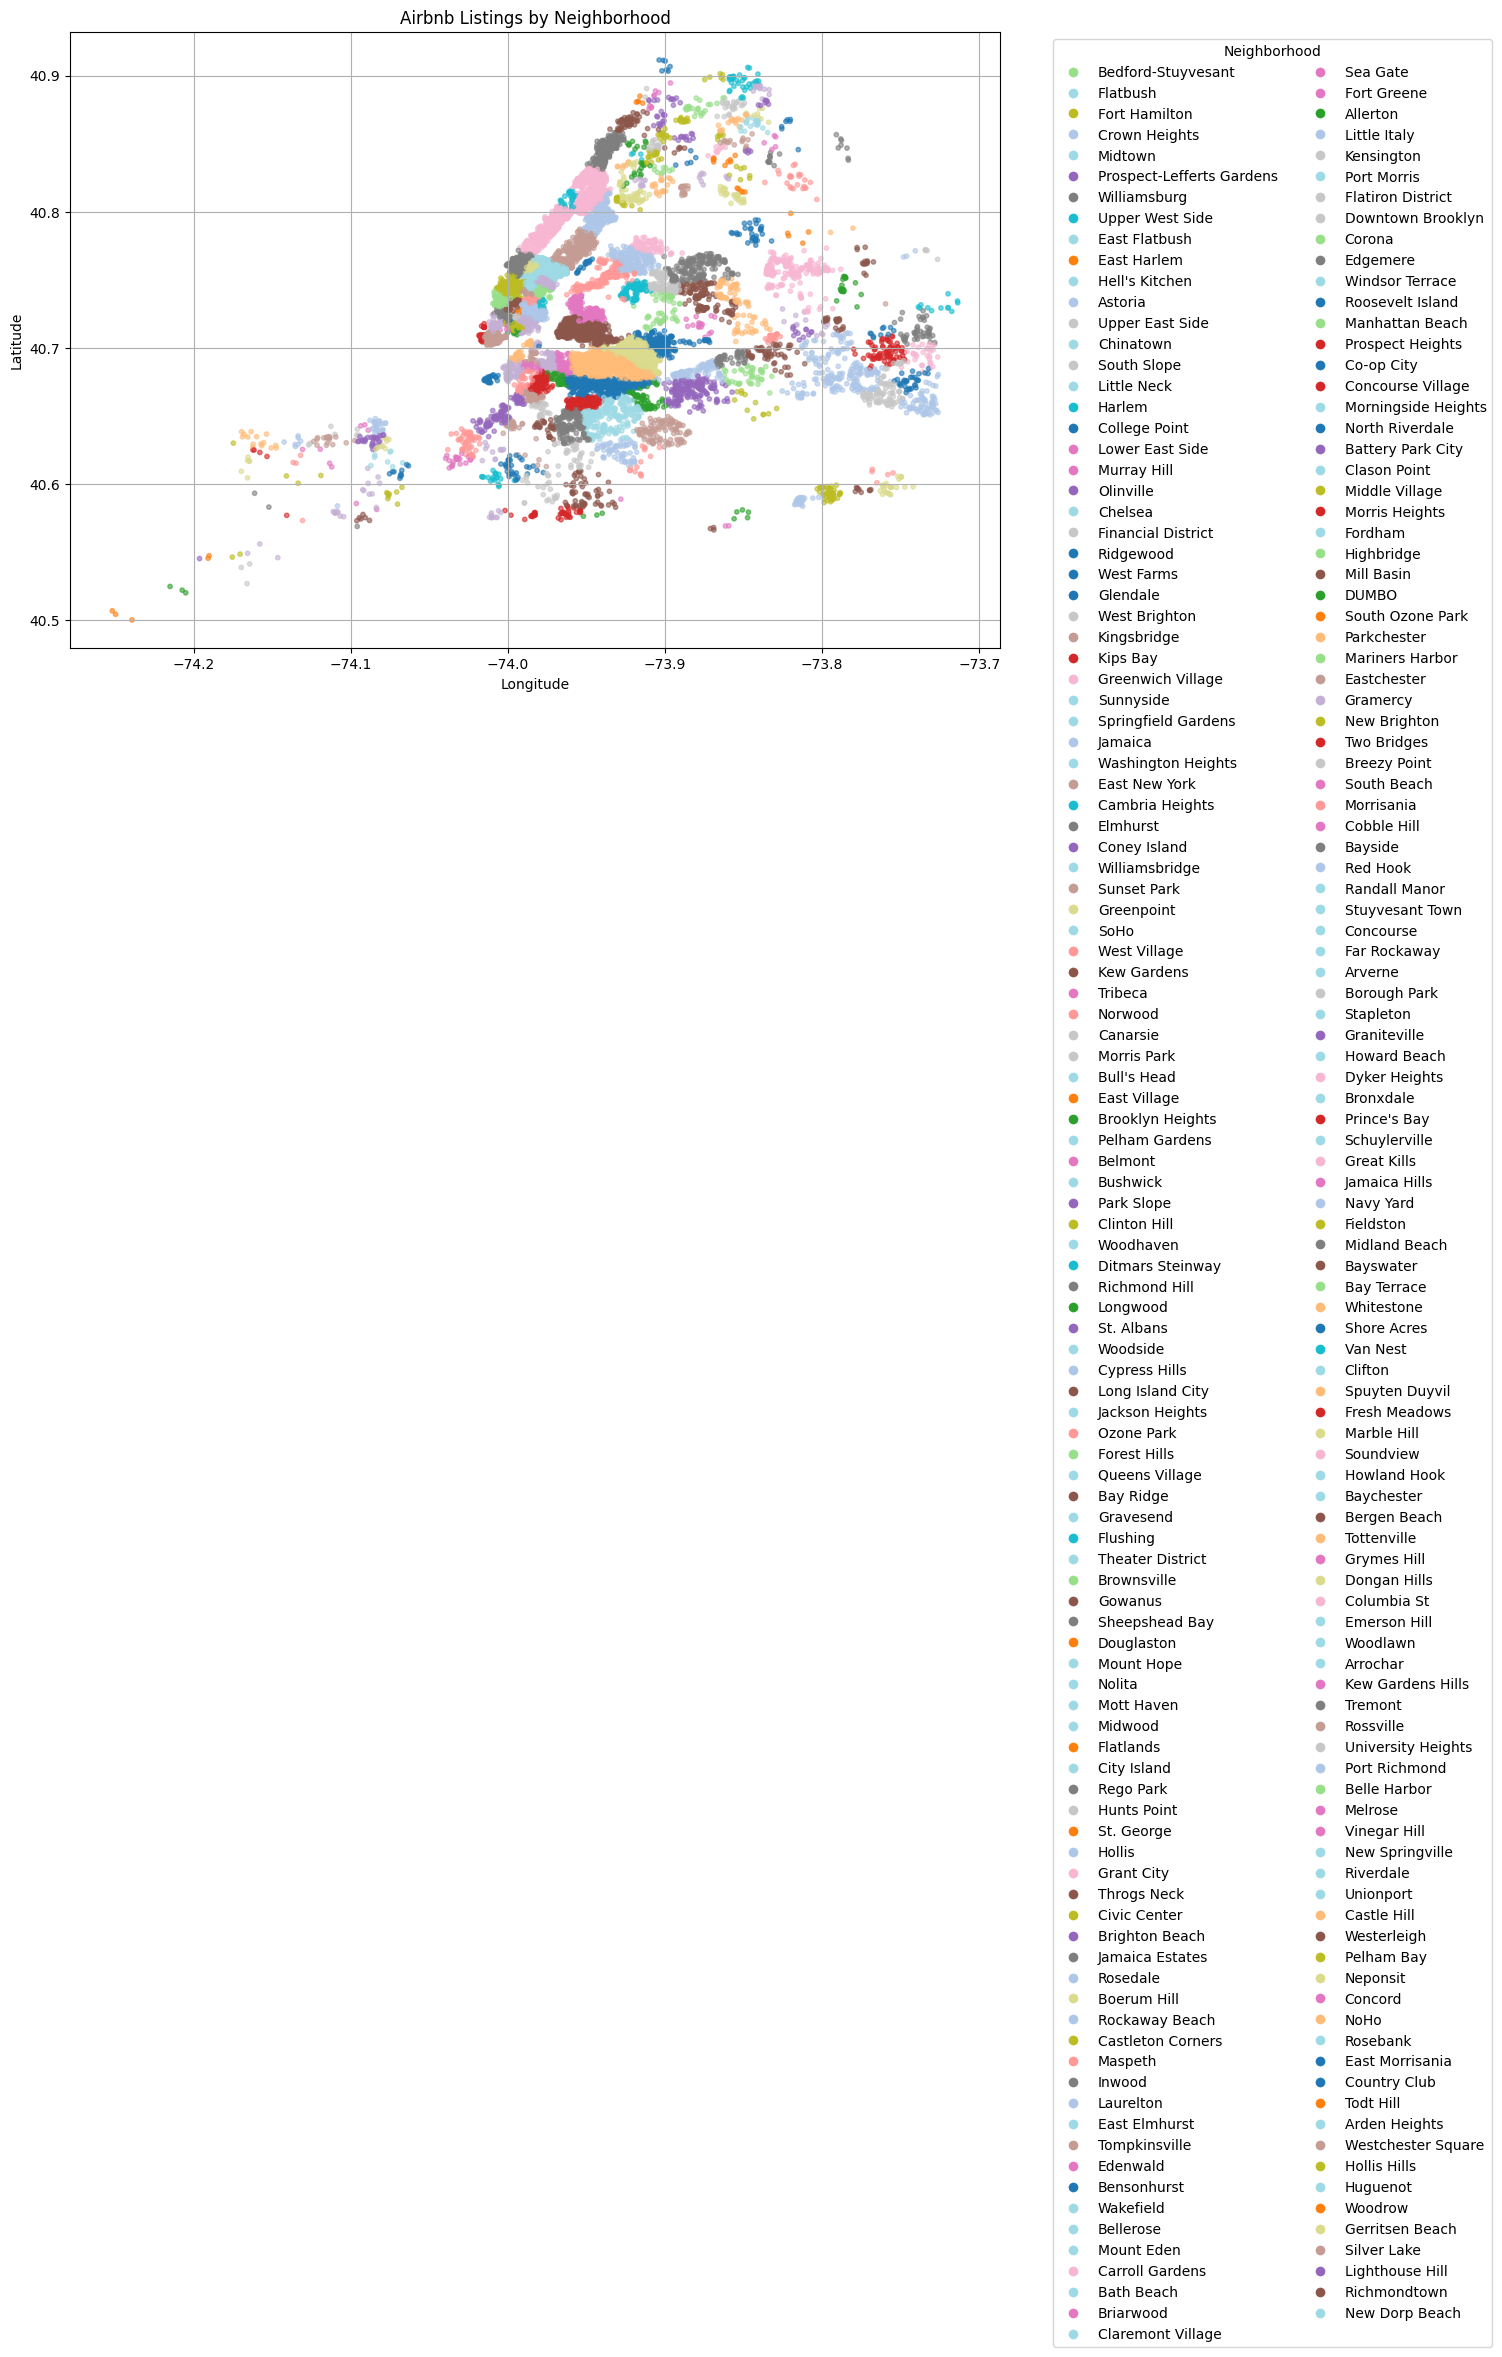

In [267]:
# Prepare unique neighborhoods and assign colors
unique_neighborhoods = df_simple['neighbourhood_cleansed'].unique()
neighborhood_to_color = {neighborhood: np.random.randint(300) for idx, neighborhood in enumerate(unique_neighborhoods)}
colors = df_simple['neighbourhood_cleansed'].map(neighborhood_to_color)

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['longitude'], df['latitude'], 
    c=colors, cmap='tab20', alpha=0.6, s=10
)

# Add a legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(neighborhood_to_color[neighborhood] / len(unique_neighborhoods)), markersize=8) 
    for neighborhood in unique_neighborhoods
]
plt.legend(handles, unique_neighborhoods, bbox_to_anchor=(1.05, 1), loc='upper left', title='Neighborhood', ncol=2)

# Add labels and title
plt.title('Airbnb Listings by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [236]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3]  # Depth of the decision tree
}

# Initialize the Adaboost model
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42, algorithm="SAMME")

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
)

# Fit the grid search
grid_search.fit(X, y)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

In [235]:
# Custom RMSE scoring with rounding
def rounded_rmse(y_true, y_pred):
    # Round predictions to nearest integer
    y_pred_rounded = np.round(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred_rounded))

# Custom scorer for GridSearchCV
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(rounded_rmse, greater_is_better=False)

In [243]:
def threshold_rounding(y_pred, thresholds):
    """
    Rounds predictions to bins based on custom thresholds.
    Args:
        y_pred: array of predictions
        thresholds: list of thresholds for rounding
    Returns:
        Rounded predictions
    """
    rounded_predictions = np.zeros_like(y_pred)
    for i, threshold in enumerate(thresholds):
        rounded_predictions += (y_pred >= threshold).astype(int)
    return rounded_predictions

def threshold_rmse(y_true, y_pred, thresholds):
    y_pred_rounded = threshold_rounding(y_pred, thresholds)
    return np.sqrt(mean_squared_error(y_true, y_pred_rounded))


In [ ]:
from scipy.optimize import minimize

# Objective function to minimize RMSE
def optimize_thresholds(thresholds, y_true, y_pred):
    return threshold_rmse(y_true, y_pred, thresholds)

# Initial thresholds (default rounding at .5 for bins 0 to 5)
initial_thresholds = [0.5, 1.5, 2.5, 3.5, 4.5]

In [252]:
xgb_model = xgb.XGBRegressor(tree_method="hist", eval_metric='rmse', reg_)
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'grow_policy': ['depthwise', 'lossguide'],
    'learning_rate': [0.1, 0.01]
}

# Train the model with GridSearchCV
xgb_grid_search = GridSearchCV(
    xgb_model,
    xgb_param_grid,
    cv=5,
    scoring=rmse_scorer
)
xgb_grid_search.fit(X_train, y_train)

# Use the best model
best_model = xgb_grid_search.best_estimator_
best_params = xgb_grid_search.best_params_
print(f"Best XGB parameters: {best_params}")


Best XGB parameters: {'grow_policy': 'depthwise', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [250]:
best_params = xgb_grid_search.best_params_
print(f"Best XGB parameters: {best_params}")

Best XGB parameters: {'grow_policy': 'depthwise', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [261]:
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
importance_df

,Feature,Importance
236,room_type_Entire home/apt,0.362712
38,shared_bathrooms,0.114599
23,minimum_nights,0.045165
228,neighbourhood_group_cleansed_Manhattan,0.023056
41,has_dishwasher,0.018790
14,accommodates,0.014780
16,bedrooms,0.012206
238,room_type_Private room,0.012126
15,bathrooms,0.011769
45,has_gym,0.010759


In [268]:
# Predict on the validation set
y_pred = best_model.predict(X_test)

# Optimize rounding thresholds
result = minimize(
    optimize_thresholds,
    [0.5, 1.5, 2.5, 3.5, 4.5],  # Initial thresholds
    args=(y_test, y_pred),
    method='Powell'
)

# Optimized thresholds
optimized_thresholds = result.x
print(f"Optimized thresholds: {optimized_thresholds}")

# Apply optimized thresholds to predictions
y_pred_optimized = threshold_rounding(y_pred, optimized_thresholds)

# Calculate final RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final RMSE (with optimized rounding): {final_rmse}")


Optimized thresholds: [0.51464492 1.6664427  2.5        3.50297175 4.58304763]
Final RMSE (with optimized rounding): 0.7396781107791698


In [224]:
X.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('bool')], dtype=object)

In [228]:
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_root_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'grow_policy': ['depthwise', 'lossguide'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [227]:
# Best parameters and score
print(f"Best parameters: {xgb_grid_search.best_params_}")
print(f"Best RMSE: {-xgb_grid_search.best_score_}")

Best parameters: {'grow_policy': 'depthwise', 'max_depth': 4, 'n_estimators': 200}
Best RMSE: 0.7536211701376627


In [112]:
y_encoded.shape

(15696, 6)

In [135]:
def join_amenities_column(amenities_column):
    """
    Joins strings within each row of the amenities column with ', ' and 
    separates rows with '; '.
    """
    def clean_strings(strings):
        # Replace invalid Unicode characters in each string
        return [s.encode('utf-8', 'replace').decode('utf-8') for s in strings]
    
    row_strings = amenities_column.apply(
        lambda x: ", ".join(clean_strings(x)) if isinstance(x, list) else ""
    )
    all_amenities = "; ".join(row_strings)
    return all_amenities

result = join_amenities_column(df['amenities'])
output_file_path = "amenities.txt"
with open(output_file_path, "w") as file:
    file.write(result)

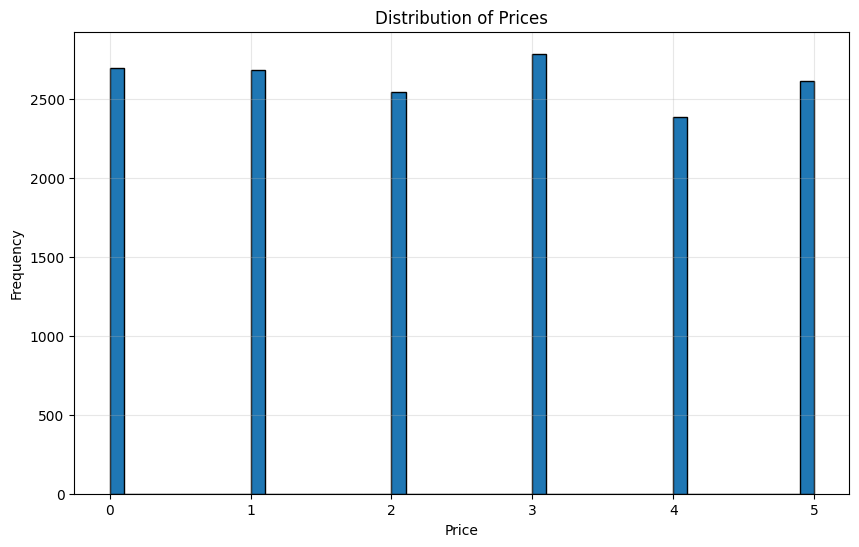

In [272]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()